### QUESTION 2:

In [3]:
# set parameter values
import numpy as np
import matplotlib.pyplot as plt
ALPHA = .4
GAMMA = .5
DELTA = .05
BETA =  .96

size_k = 50  # Number of grid points
k_min = 0 
k_max = 20

size_z = 30 # Number of z points
z_min = 1
z_max = 2

In [ ]:
def gen_consump_matrix(k_vals, z_vals):
    '''
    Consumption is a function of k and k from next period, the parameter delta,
        and the observed value of z
    Returns a hyper-matrix of the consumption values given inputs
    
    Inputs:
        - k_vals: (size_k x 1) vector of possible k/k_prime values
        - z_vals: (size_z x 1) vector of possible z values
    
    Returns:
        - C: (size_k x size_k) of investment values
    '''
    
    size_k = k_vals.shape[0]
    size_z = z_vals.shape[0]
    
    C = np.zeros( (size_k, size_k, size_z) )
    
    for i in range(size_k):
        for j in range(size_k):
            for k in range(size_z):
                cur_k = k_vals[i]
                cur_k_prime = k_vals[j]
                cur_z = z_vals[k]
                C[i,j,k] = cur_z * cur_k**ALPHA - cur_k_prime + (1-DELTA)*cur_k
    
    return C 
    
    
    
    

In [ ]:
# Generate our possible k's and possible z's then create the k_vals vector and the z_vals vector
k_vals = np.linspace(k_min, k_max, size_k)
z_vals = np.linspace(z_min, z_max, size_z)

C = gen_consump_matrix(k_vals, z_vals)
C[C<=0] = 1e-15
U = (C ** (1 - GAMMA)) / (1 - GAMMA)

In [ ]:
# Calculate the prob vector for z
import ar1_approx as ar1
ln_z_vals, pi_t = ar1.addacooper(size_z, 0, 0, sigma_v)
z_vals = np.exp(ln_z_vals)
z_probs = np.transpose(pi_t)

z_probs = z_probs[1,:]

In [ ]:
# Do value function iteration
VFtol = 1e-3 
VFdist = 7.0 
VFmaxiter = 300
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros( (size_k, size_k, size_z) ) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k'
            for k in range(size_z): # loop over z 
                E = V[j,:] @ z_probs
                Vmat[i, j, k] = U[i, j, k] + BETA * E 
      
    Vstore[:,:, VFiter] = V.reshape(size_k,size_z) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    
    print("VFdist is {} at iteration {}".format(VFdist, VFiter))
    VFiter += 1 


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

In [ ]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_vals, VF[:, 1], label='$\epsilon$ = ' + str(z_vals[0]))
ax.plot(k_vals, VF[:, 3], label='$\epsilon$ = ' + str(z_vals[1]))
ax.plot(k_vals, VF[:, 5], label='$\epsilon$ = ' + str(z_vals[2]))
ax.plot(k_vals, VF[:, 7], label='$\epsilon$ = ' + str(z_vals[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('capital (k) at time t')
plt.ylabel('Value Function')
plt.title('Value Function - stochastic return')
plt.show()

In [ ]:
# Plot policy function
optK = k_vals[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_vals, optK[:, 1], label='$\epsilon$ = ' + str(z_vals[0]))
ax.plot(k_vals, optK[:, 3], label='$\epsilon$ = ' + str(z_vals[1]))
ax.plot(k_vals, optK[:, 5], label='$\epsilon$ = ' + str(z_vals[2]))
ax.plot(k_vals, optK[:, 7], label='$\epsilon$ = ' + str(z_vals[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('capital (k) at time t')
plt.ylabel("Optimal choice of k' at time t+1")
plt.title('Policy Function - stochastic return')
plt.show()

## QUESTION 3:

In [ ]:
# Calculate the prob vector for z
import ar1_approx as ar1
sigma_v = 0.1
ln_z_vals, pi_t = ar1.addacooper(size_z, 0, 0.8, sigma_v)
z_vals = np.exp(ln_z_vals)
z_probs = np.transpose(pi_t)


In [ ]:
# Do value function iteration
VFtol = 1e-3 
VFdist = 7.0 
VFmaxiter = 300
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros( (size_k, size_k, size_z) ) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k'
            for k in range(size_z): # loop over z 
                E = V[j,:] @ z_probs[k]
                Vmat[i, j, k] = U[i, j, k] + BETA * E 
      
    Vstore[:,:, VFiter] = V.reshape(size_k,size_z) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    
    print("VFdist is {} at iteration {}".format(VFdist, VFiter))
    VFiter += 1 


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

In [ ]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_vals, VF[:, 1], label='$\epsilon$ = ' + str(z_vals[0]))
ax.plot(k_vals, VF[:, 3], label='$\epsilon$ = ' + str(z_vals[1]))
ax.plot(k_vals, VF[:, 5], label='$\epsilon$ = ' + str(z_vals[2]))
ax.plot(k_vals, VF[:, 7], label='$\epsilon$ = ' + str(z_vals[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('capital (k) at time t')
plt.ylabel('Value Function')
plt.title('Value Function - stochastic return (AR(1) process)')
plt.show()

In [ ]:
# Plot policy function
optK = k_vals[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_vals, optK[:, 1], label='$\epsilon$ = ' + str(z_vals[0]))
ax.plot(k_vals, optK[:, 3], label='$\epsilon$ = ' + str(z_vals[1]))
ax.plot(k_vals, optK[:, 5], label='$\epsilon$ = ' + str(z_vals[2]))
ax.plot(k_vals, optK[:, 7], label='$\epsilon$ = ' + str(z_vals[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('capital (k) at time t')
plt.ylabel("Optimal choice of k' at time t+1")
plt.title('Policy Function - stochastic return (AR(1) process)')
plt.show()

## QUESTION 4:

In [19]:
import ar1_approx as ar1
import numpy as np

In [28]:
# Calculate the prob vector for wage draws
size_w = 50  # Number of w wage grid points
sigma_v = 0.15
mu_v = 0
rho_v = 0

ln_w_vals, pi_t = ar1.addacooper(size_w, mu_v, rho_v, sigma_v)
w_vals = np.exp(ln_w_vals)
w_probs = np.transpose(pi_t)

# Our wage in next period is unconditional - extract a single row
w_probs = w_probs[:,1]

In [ ]:
# Set initial parameters
BETA = 0.96 # Discounting
b = 0.05 # Unemployment benefits


In [62]:
# Write function for VFI given certain params
def VFI_discrete(w_probs, w_vals, beta, b):
    '''
    Given probabilities for w and choice of beta (discounting) 
    and b (unemployment benefits) returns
    the following information:

    
    Returns (tuple) containing:
        - V: solution to the functional equation
        - PF_discrete: policy function solution
        - break_point: "hinge" point of w at point of indifference
    '''
    size_w = w_probs.shape[0]
    VFtol = 1e-2
    VFdist = 7.0 
    VFmaxiter = 300 
    V = np.zeros((size_w)) # initial guess at value function
    TV = np.zeros((size_w))
    PF_discrete = np.zeros((size_w))
    Vmat = np.zeros((size_w, size_w)) # initialize Vmat matrix
    Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
    VFiter = 1 

    while VFdist > VFtol and VFiter < VFmaxiter:
        EV = V @ w_probs # calculate expected Value Function

        for i in range(size_w): # loop over w  
            cur_w = w_vals[i]
            U_accept = cur_w / (1-beta)  # Lifetime expected value from accepting
            Vwait = b + beta * EV           # Lifetime expceted value from waiting

            TV[i] = max(U_accept, Vwait)
            PF_discrete[i] = U_accept >= Vwait  # = 1 if eat cake

        Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
        VFdist = (np.absolute(V - TV)).max()  # check distance
        V = TV
        VFiter += 1 

    if VFiter < VFmaxiter:
        #print('Value function converged after this many iterations:', VFiter)
        pass
    else:
        print('Value function did not converge')          
    
    #NOTE: when not absolute max returns the first, which indicates the break point
    break_point = w_vals[ np.argmax(PF_discrete) ]
    
    return (V, PF_discrete, break_point)


In [63]:
import matplotlib.pyplot as plt

Break even wage offer is: 0.9738879885903856


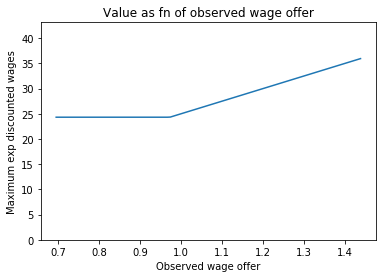

In [64]:
# Calculate V under the initial assumptions, print value function, print break point wage offer
results0 = VFI_discrete(w_probs, w_vals, BETA, b)
V, PF_discrete, break_point = results0

plt.plot(w_vals, V)
plt.xlabel("Observed wage offer")
plt.ylabel("Maximum exp discounted wages")
plt.title("Value as fn of observed wage offer")
plt.ylim((0,np.max(V)*1.2))

print("Break even wage offer is: {}".format(break_point))

Text(0.5,1,'Break point wage as fn of unemploy benefits')

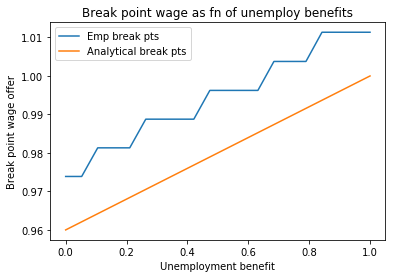

In [71]:
# Calculate the break even wage as a function of b, the unemployment benefits
b_vals = np.linspace(0, 1, 20)
break_points = np.empty(b_vals.size)
for i in range(b_vals.size):
    cur_b = b_vals[i]
    b_p = VFI_discrete(w_probs, w_vals, BETA, cur_b)[2]
    break_points[i] = b_p

break_points_anal = b_vals * (1-BETA) + BETA * 1

plt.plot(b_vals, break_points, label='Emp break pts')
plt.plot(b_vals, break_points_anal, label='Analytical break pts')
plt.legend()
plt.xlabel("Unemployment benefit")
plt.ylabel("Break point wage offer")
plt.title("Break point wage as fn of unemploy benefits")


NOTE: I believe the flat areas and the slight vertical adjustment between the empirical and the analytically derived results are due to the discretization required by the computation.
As shown in the analytic section, the relationship should be linear